In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0001036070"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0001036070
SIC,6022
Description,STATE COMMERCIAL BANKS
Name,StellarOne CORP
Ticker,STEL


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,16.0,1.793625e+01,7.618738e-01,16.31,17.42,1.787500e+01,1.851500e+01,19.11
interest income,37.0,2.634197e+07,6.699341e+06,15272000.00,21903000.00,2.788400e+07,3.036900e+07,44052000.00
net income,38.0,4.117553e+06,1.375592e+06,546000.00,3473250.00,4.170000e+06,4.979250e+06,6317000.00
net interest income,38.0,1.877566e+07,5.669517e+06,10281000.00,14160750.00,1.637850e+07,2.419425e+07,29333000.00
provision for loan losses,38.0,1.656500e+06,2.020858e+06,-385000.00,322250.00,6.585000e+05,2.601250e+06,7350000.00


# Plots

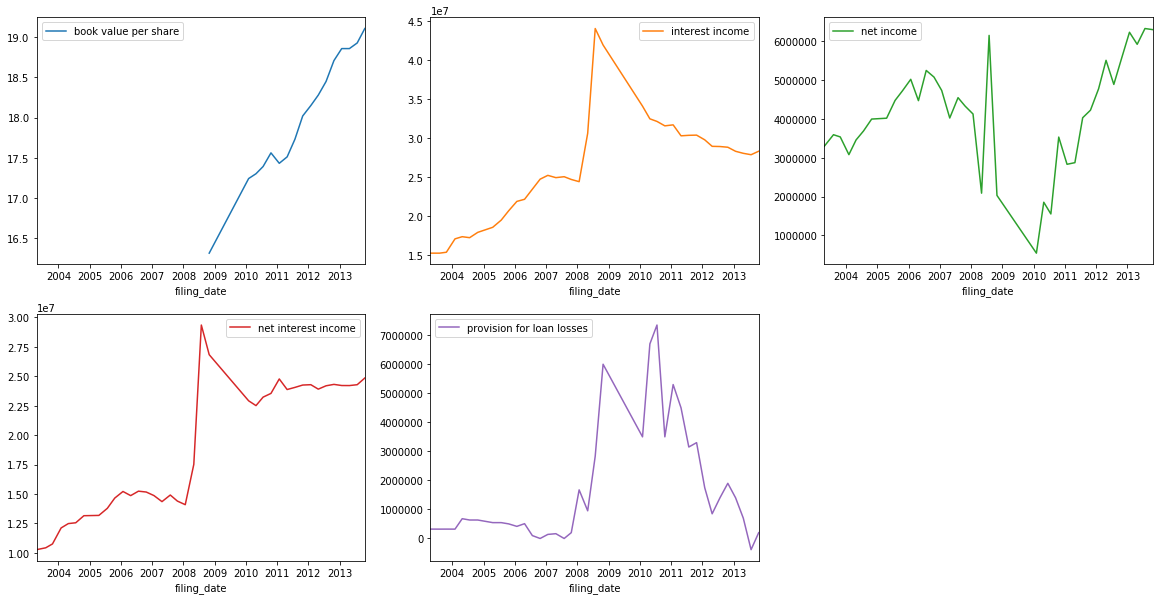

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period msg_type  \
cik        item                                                               
0001036070 book value per share       2003Q1 to 2008Q2: 22 periods  missing   
           book value per share        2008Q4 to 2009Q3: 4 periods  missing   
           book value per share                             2013Q1  missing   
           interest income                                  2003Q2  missing   
           interest income                                  2004Q4  missing   
           interest income             2008Q4 to 2009Q3: 4 periods  missing   
           net income                                       2004Q4  missing   
           net income                  2008Q4 to 2009Q3: 4 periods  missing   
           net interest income                              2004Q4  missing   
           net interest income         2008Q4 to 2009Q3: 4 periods  missing   
           provision for loan losses                        2004Q4  missing   
           provision for loan losses   2008Q4 to 2009Q3: 4 periods  missing   
           total revenue                                      None    empty   

                                                 message  
cik        item                                           
0001036070 book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net interest income            Missing period  
           net interest income            Missing period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           total revenue              No values for item

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()